# FPL Oracle Notebook v1

## Setup and Configuration

In [9]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

# FPL API URL
FPL_API_URL = "https://fantasy.premierleague.com/api/"

# Function to get data from the FPL API
def get_fpl_data(endpoint):
    response = requests.get(f"{FPL_API_URL}{endpoint}/")
    return response.json()


## Data Collection

In [10]:
# Get all players data
players_data = get_fpl_data('bootstrap-static')['elements']

# Convert to DataFrame
players_df = pd.DataFrame(players_data)

# Get teams data
teams_data = get_fpl_data('bootstrap-static')['teams']
teams_df = pd.DataFrame(teams_data)

# Display the first few rows of the DataFrame
players_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,None,438098,0,0,0,0,0,3,3.0,...,140,86,464,187,250,104,456,152,0.62,0.31
1,NaN,None,205651,0,0,0,0,0,4,3.2,...,29,12,543,54,143,22,178,32,1.04,0.67
2,NaN,None,226597,0,0,0,0,0,2,4.2,...,81,6,498,185,42,6,27,10,1.01,0.47
3,NaN,None,219847,0,0,0,0,0,4,3.5,...,12,4,562,65,18,4,25,5,1.03,0.55
4,NaN,None,463748,0,0,0,0,0,1,2.0,...,554,60,55,23,445,52,374,57,0.00,0.00


## Data Preprocessing

In [11]:
# Select relevant columns
players_df = players_df[['id', 'web_name', 'team', 'element_type', 'now_cost', 'total_points', 'minutes', 'points_per_game', 'value_season', 'status']]

# Convert necessary columns to appropriate data types
players_df['now_cost'] = players_df['now_cost'] / 10  # Convert cost to millions
players_df['value_season'] = pd.to_numeric(players_df['value_season'], errors='coerce')

# Filter out injured or suspended players
available_players_df = players_df[players_df['status'] == 'a']

# Display the first few rows of the filtered DataFrame
available_players_df.head()


,id,web_name,team,element_type,now_cost,total_points,minutes,points_per_game,value_season,status
0,1,Fábio Vieira,1,3,5.5,24,290,2.2,4.4,a
1,2,G.Jesus,1,4,7.0,85,1470,3.1,12.1,a
2,3,Gabriel,1,2,6.0,149,3042,4.1,24.8,a
3,4,Havertz,1,4,8.0,180,2627,4.9,22.5,a
4,5,Hein,1,1,4.0,0,0,0.0,0.0,a


## Exploratory Data Analysis (EDA)

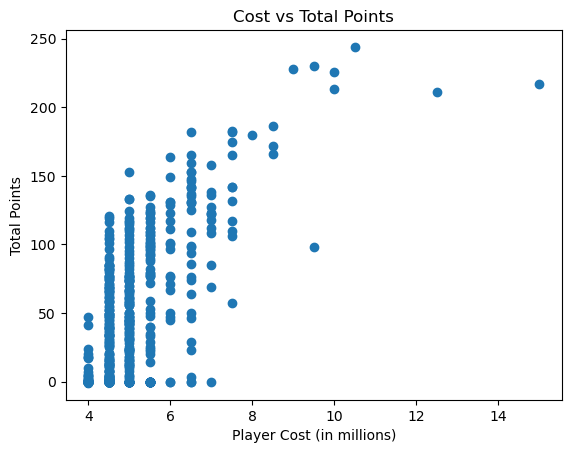

/var/folders/1b/k03k_fmx6jjf9txbx46k0fs80000gn/T/ipykernel_41760/3903528954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_players_df['roi'] = available_players_df['total_points'] / available_players_df['now_cost']


,id,web_name,team,element_type,now_cost,total_points,minutes,points_per_game,value_season,status,roi
235,235,Pickford,8,1,5.0,153,3420,4.0,30.6,a,30.600000
23,24,White,1,2,6.5,182,2987,4.9,28.0,a,28.000000
17,18,Saliba,1,2,6.0,164,3420,4.3,27.3,a,27.333333
191,191,Andersen,7,2,4.5,121,3416,3.2,26.9,a,26.888889
248,248,Leno,9,1,5.0,133,3420,3.5,26.6,a,26.600000
386,383,Onana,14,1,5.0,133,3420,3.5,26.6,a,26.600000
91,91,Flekken,4,1,4.5,119,3285,3.2,26.4,a,26.444444
519,513,Areola,19,1,4.5,116,2700,3.7,25.8,a,25.777778
15,16,Rice,1,3,6.5,165,3225,4.3,25.4,a,25.384615
57,58,Watkins,2,4,9.0,228,3222,6.2,25.3,a,25.333333


In [12]:
# Correlation between cost and total points
plt.scatter(available_players_df['now_cost'], available_players_df['total_points'])
plt.xlabel('Player Cost (in millions)')
plt.ylabel('Total Points')
plt.title('Cost vs Total Points')
plt.show()

# Calculate ROI: Total points per million spent
available_players_df['roi'] = available_players_df['total_points'] / available_players_df['now_cost']

# Top 20 players by ROI
top_20_roi = available_players_df.nlargest(20, 'roi')
top_20_roi


## Team Selection Algorithm

In [13]:
# Constraints
BUDGET = 100  # 100 million
SQUAD_SIZE = 15
POSITION_LIMITS = {'GKP': 2, 'DEF': 5, 'MID': 5, 'FWD': 3}
TEAM_LIMIT = 3

# Get position types
positions_data = get_fpl_data('bootstrap-static')['element_types']
positions_df = pd.DataFrame(positions_data)
position_mapping = positions_df.set_index('id')['singular_name_short'].to_dict()

# Add position to the players DataFrame
available_players_df['position'] = available_players_df['element_type'].map(position_mapping)

# Initialize the team
team = []
budget_left = BUDGET
position_count = {'GKP': 0, 'DEF': 0, 'MID': 0, 'FWD': 0}
team_count = {team['id']: 0 for team in teams_data}

# Select top 3 star players by total points first
star_players = available_players_df.nlargest(3, 'total_points')
for _, player in star_players.iterrows():
    team.append(player)
    budget_left -= player['now_cost']
    position_count[player['position']] += 1
    team_count[player['team']] += 1

# Remove selected star players from available players
available_players_df = available_players_df.drop(star_players.index)

# Fill the remaining spots with high ROI players
for _, player in available_players_df.sort_values('roi', ascending=False).iterrows():
    if len(team) >= SQUAD_SIZE:
        break
    if budget_left < player['now_cost']:
        continue
    if position_count[player['position']] >= POSITION_LIMITS[player['position']]:
        continue
    if team_count[player['team']] >= TEAM_LIMIT:
        continue
    
    team.append(player)
    budget_left -= player['now_cost']
    position_count[player['position']] += 1
    team_count[player['team']] += 1

# Convert the team to DataFrame for display
team_df = pd.DataFrame(team)
team_df

/var/folders/1b/k03k_fmx6jjf9txbx46k0fs80000gn/T/ipykernel_41760/4237370392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_players_df['position'] = available_players_df['element_type'].map(position_mapping)


,id,web_name,team,element_type,now_cost,total_points,minutes,points_per_game,value_season,status,roi,position
182,182,Palmer,6,3,10.5,244,2617,7.2,23.2,a,23.238095,MID
350,348,Foden,13,3,9.5,230,2860,6.6,24.2,a,24.210526,MID
57,58,Watkins,2,4,9.0,228,3222,6.2,25.3,a,25.333333,FWD
235,235,Pickford,8,1,5.0,153,3420,4.0,30.6,a,30.600000,GKP
23,24,White,1,2,6.5,182,2987,4.9,28.0,a,28.000000,DEF
17,18,Saliba,1,2,6.0,164,3420,4.3,27.3,a,27.333333,DEF
191,191,Andersen,7,2,4.5,121,3416,3.2,26.9,a,26.888889,DEF
386,383,Onana,14,1,5.0,133,3420,3.5,26.6,a,26.600000,GKP
15,16,Rice,1,3,6.5,165,3225,4.3,25.4,a,25.384615,MID
219,219,Branthwaite,8,2,5.0,124,3116,3.5,24.8,a,24.800000,DEF


## Performance Tracking

In [14]:
# Function to calculate total team points
def calculate_team_points(team_df):
    return team_df['total_points'].sum()

# Calculate the total points for the selected team
total_team_points = calculate_team_points(team_df)
print(f"Total points for the selected team: {total_team_points}")


Total points for the selected team: 2501


## Updating and Re-running the Algorithm

In [15]:
# Function to update player data for a new game week
def update_player_data():
    new_players_data = get_fpl_data('bootstrap-static')['elements']
    new_players_df = pd.DataFrame(new_players_data)
    new_players_df = new_players_df[['id', 'web_name', 'team', 'element_type', 'now_cost', 'total_points', 'minutes', 'points_per_game', 'value_season', 'status']]
    new_players_df['now_cost'] = new_players_df['now_cost'] / 10
    new_players_df['value_season'] = pd.to_numeric(new_players_df['value_season'], errors='coerce')
    new_players_df['position'] = new_players_df['element_type'].map(position_mapping)
    new_available_players_df = new_players_df[new_players_df['status'] == 'a']
    return new_available_players_df

# Update player data and re-run the algorithm
available_players_df = update_player_data()
# Re-run the team selection algorithm


## Visualization and Reporting

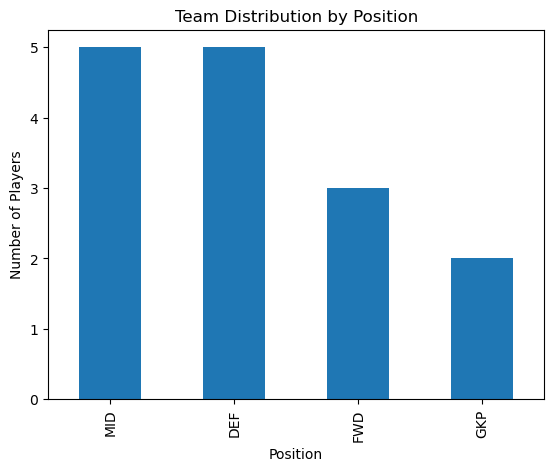

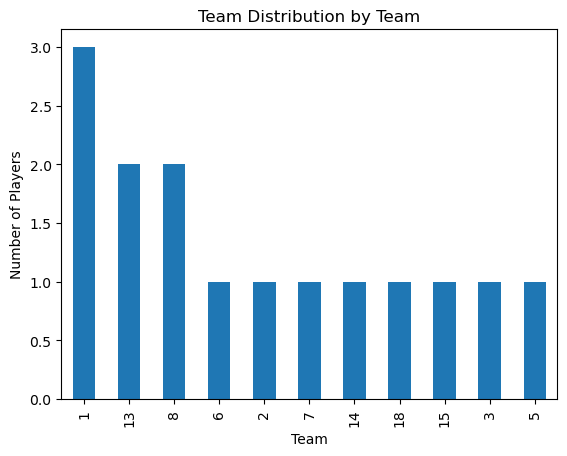

In [16]:
# Visualize team distribution by position
team_df['position'].value_counts().plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Team Distribution by Position')
plt.show()

# Visualize team distribution by team
team_df['team'].value_counts().plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Team Distribution by Team')
plt.show()
